In [2]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

In [3]:
img= cv2.imread('../Images/happyman.jpg')

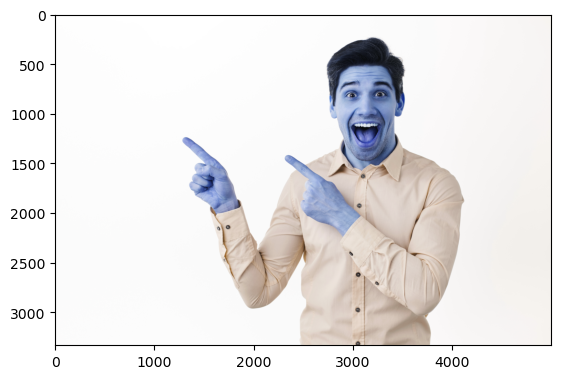

In [4]:
plt.imshow(img)

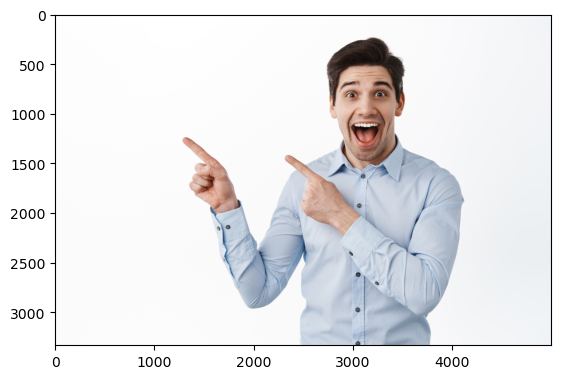

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:04<00:00,  1.24s/it]   


In [7]:
predictions

[{'emotion': {'angry': 0.0014668053154309746,
   'disgust': 1.1769175030812061e-18,
   'fear': 6.463441195592168e-05,
   'happy': 23.967573046684265,
   'sad': 0.0011591716429393273,
   'surprise': 76.02973580360413,
   'neutral': 1.0291244939564237e-08},
  'dominant_emotion': 'surprise',
  'region': {'x': 2715,
   'y': 465,
   'w': 846,
   'h': 846,
   'left_eye': (3263, 809),
   'right_eye': (2988, 814)},
  'face_confidence': 0.9,
  'age': 29,
  'gender': {'Woman': 0.10475455783307552, 'Man': 99.89523887634277},
  'dominant_gender': 'Man',
  'race': {'asian': 0.05813907482661307,
   'indian': 0.245863595046103,
   'black': 0.004392851042211987,
   'white': 75.28772950172424,
   'middle eastern': 14.5755335688591,
   'latino hispanic': 9.828341752290726},
  'dominant_race': 'white'}]

In [8]:
type(predictions)

list

In [9]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [10]:
if faceCascade.empty():
    print("Error: Could not load the cascade classifier.")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)



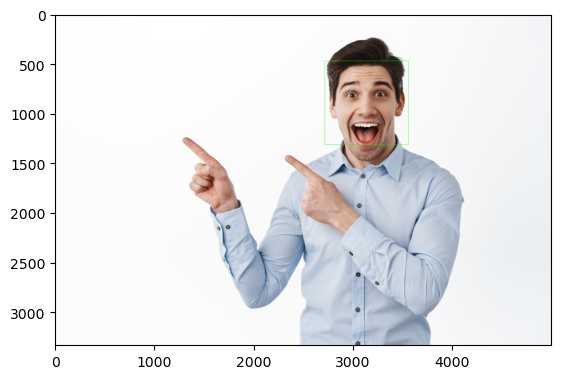

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
font= cv2.FONT_HERSHEY_TRIPLEX
dominant_emotion = predictions[0]['dominant_emotion'] 
cv2.putText(img,
                dominant_emotion,
                (500,500),
                font,50,
                (0,255,0),
                2,
                cv2.LINE_4);

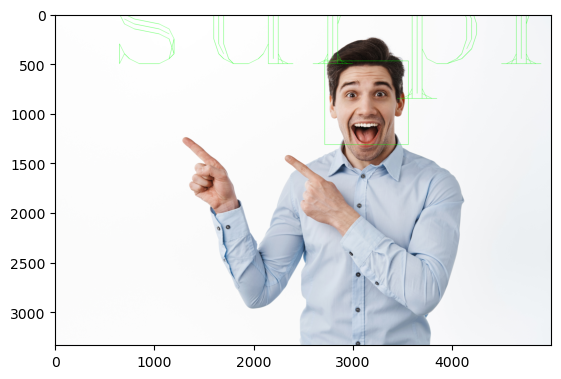

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [20]:
cap=cv2.VideoCapture(1)

if not cap.isOpened():
    cap=cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot Access Webcam!!")

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # Analyze frame for facial attributes
    result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
    
    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale frame
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
    
    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # Display the dominant emotion text
    font= cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
    dominant_emotion=result[0]['dominant_emotion']
    cv2.putText(frame,
                dominant_emotion,
                (x, y-10),
                font,50,
                (0,255,0),
                2,
                cv2.LINE_AA);  
    
    # Display the resulting frame
    cv2.imshow('Frame', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()
